In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
class Graph(object):
    source = 'http://sbrfdata.ru/opendata.zip'
    encoding = 'Windows-1251'

    def __init__(self):
        self.data = pd.read_csv(self.source, encoding=self.encoding)

        row = 0
        for date in self.data['date']:
            self.data.at[row, 'date'] = datetime.date(*list(map(int, date.split('-'))))
            row += 1

        self.data_type = ''
        self.region = ''
        self.date = {'begin': datetime.date(2013, 1, 15),
                     'end': datetime.date(2019, 1, 15)}

    def input_params(self):
        for name in self.data['name'].unique():
            print(name)
        self.data_type = input('\nВведите тип данных: ')

        for region in self.data['region'].unique():
            print(region)
        self.region = input('\nОбласть: ')

        print(f"Введите период в отрезке: c {self.data['date'].min()} по {self.data['date'].max()}")
        self.date['begin'] = datetime.date(*list(map(int, (input('Период с: ')).split('-'))))
        self.date['end'] = datetime.date(*list(map(int, (input('Период по: ')).split('-'))))

    def get_graph(self):
        data_for_graph = self.data[(self.date['begin'] <= self.data['date']) &
                                   (self.data['date'] <= self.date['end']) &
                                   (self.data['region'] == self.region) &
                                   (self.data['name'] == self.data_type)]
        date_list = data_for_graph['date'].to_list()
        value_list = data_for_graph['value'].to_list()
        plt.plot(date_list, value_list)
        plt.show()


In [3]:
graph = Graph()
graph.input_params()

Количество заявок на потребительские кредиты
Средняя сумма заявки на потребительский кредит
Количество заявок на ипотечные кредиты
Средняя сумма заявки на ипотечный кредит
Количество новых депозитов
Средняя сумма нового депозита
Средняя зарплата
Средняя пенсия
В среднем руб. на текущем счете на человека
В среднем депозитов в руб. на человека
Средние расходы по картам
Средний чек в формате Фастфуд
Средний чек в формате Ресторан
Средние траты в ресторане фастфуд
Средние траты в ресторане

Введите тип данных: Средняя пенсия
Россия
Алтайский край
Амурская область
Архангельская область
Астраханская область
Белгородская область
Брянская область
Владимирская область
Волгоградская область
Вологодская область
Воронежская область
Еврейская автономная область
Забайкальский край
Ивановская область
Иркутская область
Кабардино-Балкарская Республика
Калининградская область
Калужская область
Камчатский край
Кемеровская область
Кировская область
Костромская область
Краснодарский край
Красноярский край


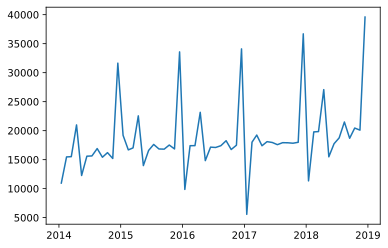

In [4]:
graph.get_graph()